<a href="https://colab.research.google.com/github/YgZINTJ/STAT3011_project/blob/main/dataVisualisation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# @title Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
# @title Downloading datasheet
data_url = 'https://raw.githubusercontent.com/YgZINTJ/STAT3011_project/refs/heads/main/StudentPerformanceFactors.csv'
df = pd.read_csv(data_url)

In [49]:
categorical_columns=[col for col in df.columns if df[col].dtype=='object']
numerical_columns = [col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int64']
print(f'categorical columns are:{categorical_columns}')
print(f'numertical columns are:{numerical_columns}')

categorical columns are:['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
numertical columns are:['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


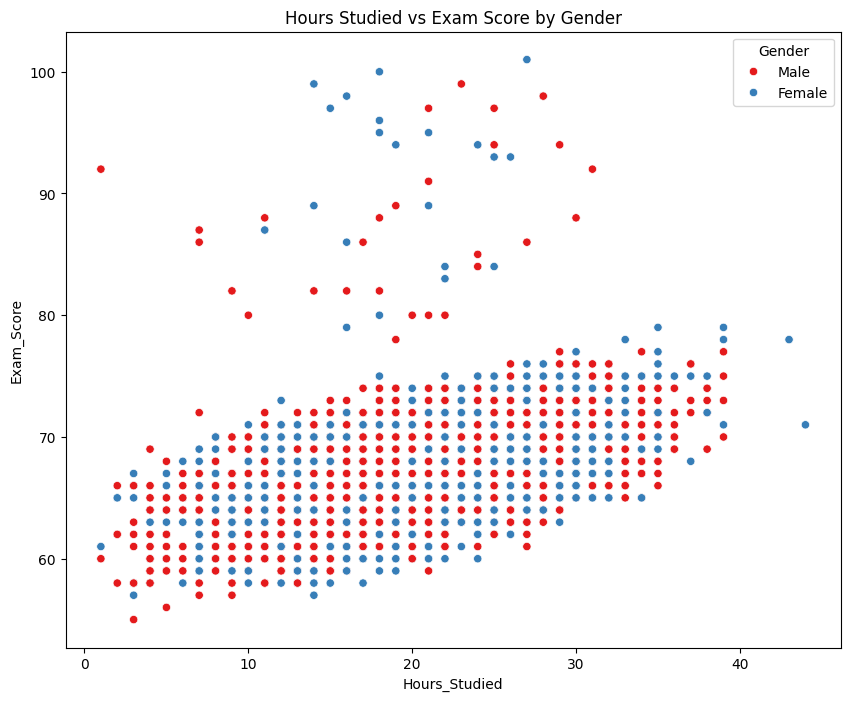

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=df, palette='Set1')
plt.title('Hours Studied vs Exam Score by Gender')
plt.show()

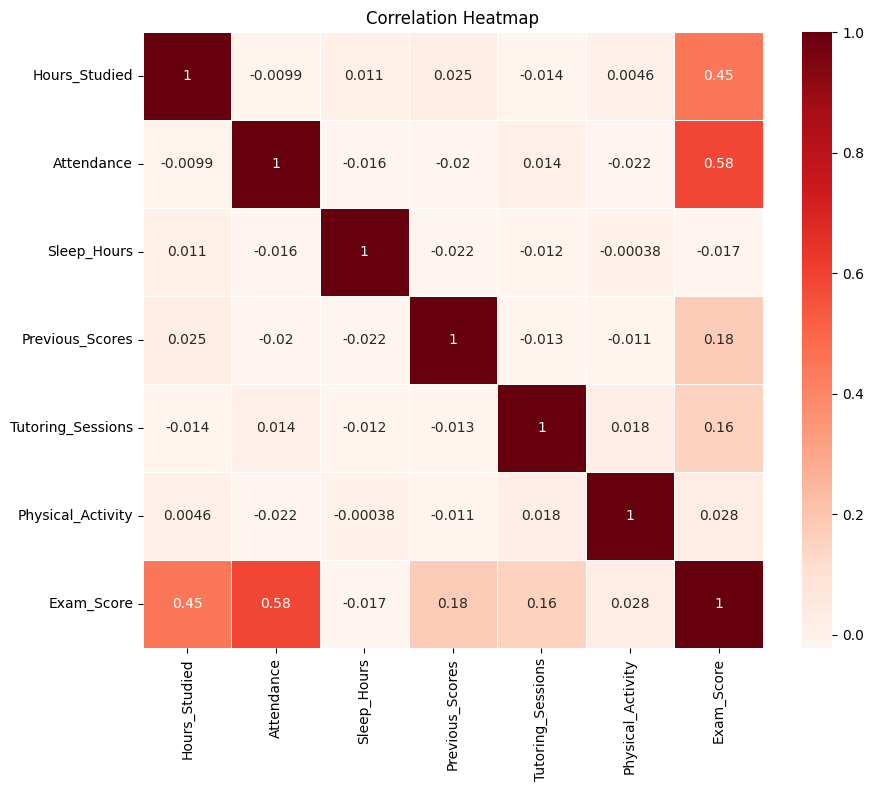

In [60]:
#@title Correlation Heatmap
# create a variable to store all numerical data
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Heatmap showing correlations between numerical features in the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='Reds', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-77-fa3ec93e1a44>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Motivation_Level',


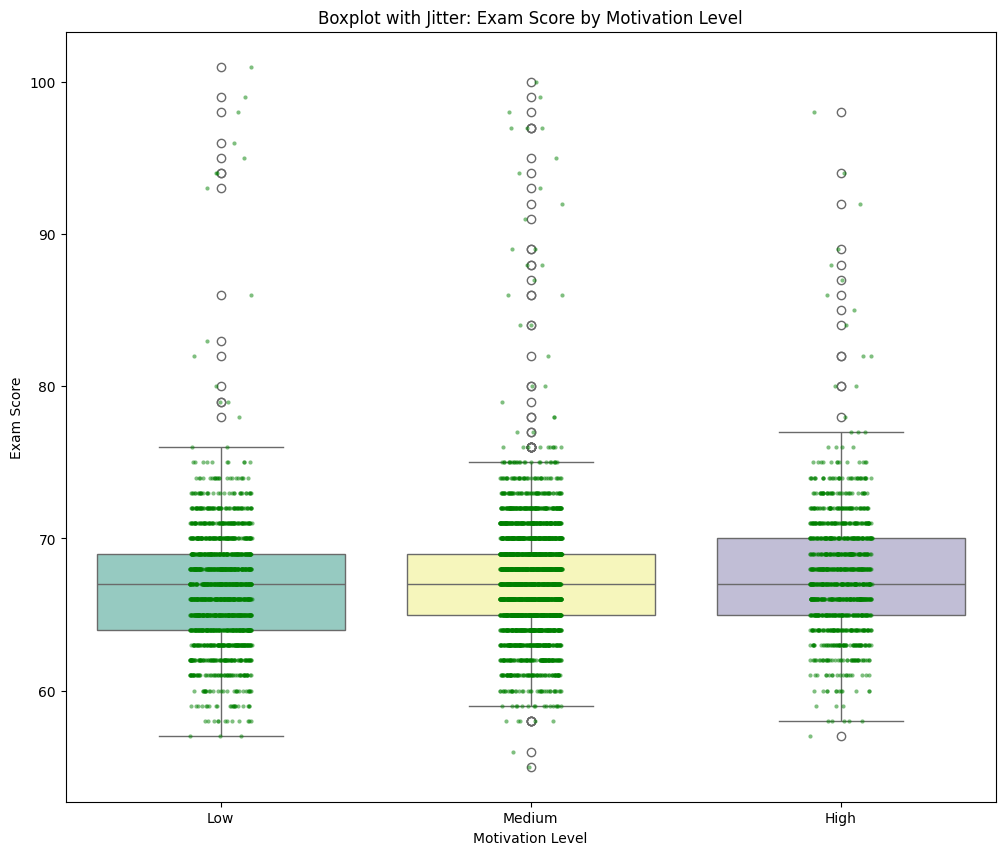

In [77]:
# Set plot size for better readability
plt.figure(figsize=(12, 10))

# Create the boxplot for 'Exam_Score' across 'Motivation_Level'
sns.boxplot(x='Motivation_Level',
            y='Exam_Score',
            data=df,
            palette="Set3")

# Add jitter (scatter points) on top of the boxplot
sns.stripplot(x='Motivation_Level',
              y='Exam_Score',
              data=df,
              color='green',
              alpha=0.5,
              jitter=True,
              size = 3)

# Set the title and labels
plt.title('Boxplot with Jitter: Exam Score by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')

# Show the plot
plt.show()